# TMA4320 - Project 3: <br> Simulating the action potential with random walk of ions
**Group number:** 27 <br>
**Group members:** Marte K. Høiskar, Maren Lium and Johanna U. Marstrander

## 1 $\,$ Theory
Skal vi skrive noe her? JAAAA

In one dimention the diffusion equation takes the form 

\begin{equation}
    \frac{\partial \phi \left( x, t \right)}{\partial x} = \frac{\partial}{\partial x} \left(D \left(x \right) \frac{\partial \phi (x, t)}{\partial x} \right)
\end{equation}

where $\phi(x,t)$ is the distribution of a substance and $D(x)$ is the (position dependent) diffusion coefficient.

## 2 $\,$ Excercises

### Excercise 2.1
*Task:* <br>
Show that the function

\begin{equation}
    \tilde{\phi} \left( x, t \right) = \frac{1}{\sqrt{4 \pi D t}} e^{ - \frac{\left( x - \mu \right)^2}{4Dt} },
\end{equation}

where D is a constant, is a solution of the diffusion equation. 

*Answer:*<br>

Since the D is a constant, the diffusion equation will be given by

\begin{equation}
    \frac{\partial \phi \left( x, t \right)}{\partial t} = D \frac{\partial^2 \phi (x, t)}{\partial x^2}.
\end{equation}

Calculating the partial derivatives of $\tilde{\phi} \left( x, t \right)$:

\begin{align}
    \frac{\partial \phi \left( x, t \right)}{\partial t} &= e^{-\frac{(x-\mu)^2}{4Dt}}\frac{\partial}{\partial t} \frac{1}{\sqrt{4 \pi Dt}} + \frac{1}{\sqrt{4 \pi Dt}}\frac{\partial}{\partial t} e^{-\frac{(x-\mu)^2}{4Dt}} \\
     &= \frac{- 4\pi D}{2 \left( 4\pi Dt \right)^{\frac{3}{2}}}e^{-\frac{(x-\mu)^2}{4Dt}}+\frac{1}{\sqrt{4 \pi Dt}} \left( e^{-\frac{(x-\mu)^2}{4Dt}} \frac{(x-\mu)^2}{4Dt^2}  \right ) \\
     &= \frac{e^{\frac{(x-\mu)^2}{4Dt}}}{\sqrt{4\pi Dt}} \left ( \frac{(x-\mu)^2}{4Dt^2}-\frac{1}{2t} \right ) \\ \\
      \frac{\partial \phi \left( x,t \right)}{\partial x} &= \frac{1}{\sqrt{4 \pi Dt}}\frac{\partial}{\partial x} e^{-\frac{(x-\mu)^2}{4Dt}} \\
      &= \frac{1}{\sqrt{4 \pi Dt}}e^{-\frac{(x-\mu)^2}{4Dt}} \left( -\frac{2(x-\mu)}{4Dt} \right) \\
       &= -\frac{e^{-\frac{(x-\mu)^2}{4Dt}}}{2Dt\sqrt{4\pi Dt}} \left( x-\mu \right) \\ \\
      \frac{\partial^2 \phi \left( x,t \right)}{\partial x^2} &= -\frac{1}{2Dt\sqrt{4\pi Dt}} \left ( (x-\mu) \frac{\partial}{\partial x} \left( e^{-\frac{(x-\mu)^2}{4Dt}} \right) + e^{-\frac{(x-\mu)^2}{4Dt}}\frac{\partial}{\partial x}(x-\mu) \right) \\
      &= -\frac{1}{2Dt\sqrt{4\pi Dt}} \left( -e^{-\frac{(x-\mu)^2}{4Dt}}\frac{2(x-\mu)^2}{4Dt}+e^{-\frac{(x-\mu)^2}{4Dt}} \right) \\
      &= \frac{e^{\frac{(x-\mu)^2}{4Dt}}}{D\sqrt{4\pi Dt}} \left ( \frac{(x-\mu)^2}{4Dt^2}-\frac{1}{2t} \right )
\end{align}

Thus, 

\begin{equation}
    \frac{\partial \phi \left( x, t \right)}{\partial t} = \frac{e^{\frac{(x-\mu)^2}{4Dt}}}{\sqrt{4\pi Dt}} \left ( \frac{(x-\mu)^2}{4Dt^2}-\frac{1}{2t} \right ) = D \frac{\partial^2 \phi (x, t)}{\partial x^2}
\end{equation}

Hence, $\tilde{\phi} \left( x, t \right)$ is a solution to the diffusion equation. 

### Excercise 2.2
#### 2.2.1
*Task:*<br>
(Initial value problem.) Given the particle distribution

\begin{equation}
    \phi \left( x, 0 \right)
    =
    \delta \left( x - x_0 \right),
\end{equation}

where $\delta(x)$ is the dirac delta function, find the particle distribution a time $t$.

*Answer:*<br>

#### 2.2.2
*Task:*<br>
Use the results of Exercise 2.2.1 to give a physical interpretation of the diffusion coefficient D.

*Answer:*<br>

#### 2.2.3
*Task:*<br>
Use the results from Exercise 2.2.1 to find the time evolution $\phi(x, t)$ given another initial condition $\phi(x, 0) = g(x)$, where $g(x)$ is an arbitrary function.

*Answer:*<br>

## 3 $\,$ Programming  
*Random walk in 1D*

<font color = 'red'> Denne koden bør så absolutt ryddes opp i etter hvert, men hey den funker så den kan ikke være sååå dum :)) </font>

In [1]:
from random import randint
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
from scipy import constants as const

In [2]:
particles = 1000         # number of particles at x = 0
time_steps = 100         # number of time steps 
d = 1                    # probability of a particle moving (in an arbitrary direction)
h = 1                    # step length


def random_walk(p_right, pos, h = 1):
    '''Input: probability d, steplength h, and a temporary position vector pos_vec
    (temporary meaning that the last element is at time t so that the return value is the position at time t + dt)
    Output: the next location of the particle'''
    
    r = randint(0, 101) / 100           # Generates a random number between 0.01 and 1
    if r <= p_right:                    # Right step
        return pos + h
    else:                               # Left step
        return pos - h

    
def random_walk_in_1D(p_right = np.ones(201)*d/2):
    '''Answer to part 3'''
    
    dist = np.zeros(particles)          # Distribution array
    
    for p in range(particles):          # Loops through every paricle
        i = 0
        for s in range(time_steps):     # Loops through time_steps per particle
            i = random_walk(p_right[i+100], i)
        dist[p] += i                    # Places the location of a particle in the distrubution array
    
    return dist


dist_1D = random_walk_in_1D()


def task_3_plot():
    
    #Plotting our data
    x_axis = np.linspace(dist_1D.min(), dist_1D.max())
   
    title = f"Particle distribution of {particles} particles after {time_steps} time steps."

    fig, ax1 = plt.subplots()
    plt.title(title)
    #ax1.plot(x_axis, dist_1D, label="Particle distribution")
    ax1.hist(dist_1D, 100)
    ax1.set_xlabel("x")
    ax1.set_ylabel("Number of particles")

    #Plotting a fitted normal distribution
    muf, stdf = norm.fit(dist_1D)                            # the (ish) expected value and standard deviation of our particle  
    norm_dist = norm.pdf(x_axis, loc = muf, scale = stdf)    # the fitted normal distribution
    
    ax2 = ax1.twinx()
    ax2.set_ylabel("Probability")
    ax2.plot(x_axis, norm_dist, "r-" ,label="Fitted normal distr.")
    ax2.set_ylim(0, np.max(norm_dist)*1.05)
    ax1.set_ylim(0, 1 / (np.sqrt(2*np.pi)*stdf) *2* particles*1.05)
    #ax2.plot(x_axis, norm.pdf(x_axis, loc = 0, scale = np.sqrt(2*100)), "b-" ,label="Theory says")

    plt.legend()    
    
    print(f"Theory says:\tMu = {0}\t\tStd = {np.sqrt(2*100):.6}")
    print(f"Men vi faar:\tMu = {muf:.6}\tStd = {stdf:.6}")
    plt.show()
    
    
#task_3_plot()

*Explanation of the results based on the theory from section 1 and 2*:


## 4 $\,$ Theory
Skal vi skrive noe som helst her? 

## 5 $\,$ Programming 
*Random walk in a potential*

In [3]:
temperature = 298.15                      # Set to room temperature (25 Celcius)
beta = 1 / (const.k * temperature)        # Where const.k is the Boltzmann constant and 298.15 is the temperature in kelvin
beta_k = np.array([0.1, 0.5, 2, 5, 10])   # Selected values of the constant beta*k (here, k is NOT the Boltzmann constant)


def p_right(V, x, k):
    '''Function that calculates the probability of a particle moving right in a potential'''
    return 1 / (1 + np.exp(-beta*(V(x-h, k) - V(x+h, k))))


def plot_distribution(V, title):
    '''funksjon som gjør alt for deg i oppgave 5 ;)
    Finner fordeling, og plotter fordelinga og potensialet for de valgte verdiene for beta*k'''
    x = np.linspace(-100, 100, 201)   # x-values that is used as a basis for the potential vector
    
    plt.figure(title) 
    
    for k in beta_k/beta:
        probability_vector = p_right(V, x, k)                 # an array consisting of the probabilities of a particle moving right based on the position and potential field
        distribution = random_walk_in_1D(probability_vector)  # the particle distribution due to the field 
    
        #Plotting the particle dirtibution
        fig, ax1 = plt.subplots()
        ax1.hist(distribution, bins=100, label="Particle distribution")
        ax1.set_xlabel("x")
        ax1.set_ylabel("Number of particles")    
    
        # Plotting the potential
        mi, ma = plt.xlim()
        ax2 = ax1.twinx()
        ax2.plot(x, V(x, k), "k-", label=f"V(x) = {k:.2}x\n" + r"$\beta k$"+ f" = {k*beta:.3}")
        ax2.set_ylabel("J")
        ax2.set_xlim(mi, ma)
    
        plt.legend()
        plt.show()

### Excercise 5.1

\begin{equation}
    V \left( x \right) = kx.
\end{equation}

In [4]:
def V1(x, k):     #please kom på bedre navn, jeg orker ikke
    return k*x


title_5_1 = f"Particle distribution of {particles} particles after {time_steps} time steps with potential V(x) = kx.\n"

#plot_distribution(V1, title_5_1)

### Excercise 5.2

\begin{align}
    &V \left( x \right) = k, \,\,\, \text{for} -3h < x < 3h. \\
    &V \left( x \right) = 0  \quad \text{otherwise.}
\end{align}

In [5]:
def V2(x, k):                 #Nok et dårlig navn, trademark Maren Lium ;))
    pot = np.zeros(len(x))
    for i in range(len(x)):
        if x[i] > -3*h and x[i] < 3*h:
            pot[i] = k
    return pot

    
#Denne tittelen er jævlig lang og dårlig mtp potensialforklaring heheheh :))
title_5_2 = f"Particle distribution of {particles} particles after {time_steps} time steps with constant potential in the middle???.\n"

#plot_distribution(V2, title_5_2)

### Excercise 5.3

\begin{align}
    &V \left( x \right) = -k, \quad \text{for } x < -3h. \\
    &V \left( x \right) = k \left( -1 + 2 \frac{x + 3h}{6h} \right), \quad \text{for } -3h < x < 3h. \\
    &V \left( x \right) = k, \quad\,\,\, \text{for } x > 3h.
\end{align}

In [6]:
def V3(x, k):   # Nei jeg prøvde ikke engang
    pot = np.ones(len(x))
    for i in range(len(x)):
        if x[i] < -3*h:
            pot[i] *= -k
        elif x[i] > 3*h:
            pot[i] *= k
        else:
            pot[i] *= k * (-1 + 2*(x[i] + 3*h) / 6*h)
    return pot


title_5_3 = f"Particle distribution of {particles} particles after {time_steps} time steps with funky potential (???).\n"

#plot_distribution(V3, title_5_3)

### Excercise 7.1

In [7]:
#initial conditions

Na_in_init = 60
Na_out_init = 1450
K_in_init= 1400
K_out_init = 50
T0 = 273 + 37
beta = 1 / (const.k * T0)
print(beta)
beta_V0 = [0,1,3]
L = 52
C_c = 0.07 * const.e
time_steps = 700
print("hei")

def calculate_normalized_potential(x, K_in, Na_in, membrane_pot):
    pot = np.zeros(len(x))
    for i in range(len(x)//2):
        pot[i] = (Na_in + K_in - Na_out_init - K_out_init) * 0.1e-3 * const.e**2*beta / C_c 
    pot[L//2] = (Na_in + K_in - Na_out_init - K_out_init) * 0.1e-3 *const.e**2 * beta / (C_c * 2)
    for i in range(L//2-1, L//2+2):
        pot[i] += membrane_pot
    return pot


def step(V_minus, V_plus):
    r = randint(0, 101) / 100 
    p = 1 / (1 + np.exp(-(V_minus - V_plus)))
    if r <= p:
        return 1
    else:
        return -1

def plot_potential(dist, x, pot):
    fig, ax1 = plt.subplots()
    ax1.hist(dist, bins=100, label="Particle distribution")
    ax1.set_xlabel("x")
    ax1.set_ylabel("Number of particles")    
    
    mi, ma = plt.xlim()
    ax2 = ax1.twinx()
    ax2.plot(x, pot, "k-", label=r"$\beta k$")
    ax2.set_ylabel("J")
    ax2.set_xlim(mi, ma)


    
def plot_distribution2(V0K, V0Na, title, V0_op = 0, task8 = False, potassium_pump = False):
    x = np.linspace(-L/2, L/2, L+1)   # x-values that is used as a basis for the potential vector
    
    dist_K = np.append(np.ones(K_out_init)*L//4, np.ones(K_in_init)*-L//4)
    dist_Na = np.append(np.ones(Na_out_init)*L//4, np.ones(Na_in_init)*-L//4)
    
    # Plotting the potential
    #dist = np.append(dist_K, dist_Na)
    #plot_potential(dist, x, potK)
    
    Na_in = Na_in_init
    K_in = K_in_init
    if task8:
            V0K_cl = V0K
            V0Na_cl = V0Na

    for t in range(time_steps):
        if task8:
            pot = (Na_in + K_in - Na_out_init - K_out_init)*0.1*const.e/C_c
            if (pot <= -57):
                V0Na = V0_op
                V0K = V0K_cl
            if (pot >= 30):
                V0Na = V0Na_cl
                V0K = V0_op
        if (potassium_pump and t%10 == 0 and Na_in>=3 and K_out_init+K_in_init-K_in>=2):
            posNa = np.array([], dtype = int)
            numNa=0
            index = -2
            while (numNa<3):
                a = np.argwhere(dist_Na == index)
                numNa += len(a)
                posNa = np.append(posNa, a)
                index -= 1
            dist_Na[posNa[:3]]=2
            
            posK = np.array([])
            numK =0
            index = 2
            while (numK<2):
                a = np.argwhere(dist_K == index)
                numK += len(a)
                posK = np.append(posK, a)
                index += 1
            dist_K[posNa[:2]=-2
        potK = calculate_normalized_potential(x, K_in, Na_in, V0K)
        potNa = calculate_normalized_potential(x, K_in, Na_in, V0Na)
        if t==0:
            pot_vec = np.array([potK[2]])
        else:
            pot_vec = np.append(pot_vec, [potK[2]])
        for i in range(len(dist_K)):
            if dist_K[i]>=L/2:
                dist_K[i]-=1
            elif dist_K[i]<=-L/2:
                dist_K[i]+=1
            else:
                dist_K[i]+=step(potK[int(L//2+dist_K[i])-1], potK[int(L//2+dist_K[i])+1])
        for j in range(len(dist_Na)):
            if dist_Na[j]>=L/2:
                dist_Na[j]-=1
            elif dist_Na[j]<=-L/2:
                dist_Na[j]+=1
            else:
                dist_Na[j]+=step(potNa[int(L//2+dist_Na[j])-1], potNa[int(L//2+dist_Na[j])+1])
        K_in = len([1 for n in dist_K if n<-1])
        Na_in = len([1 for n in dist_Na if n<-1])
        
    plt.figure(title)
                       
    dist = np.append(dist_K, dist_Na)
    plot_potential(dist, x, potK)
    
    #Plotting how the potenatialdifference changes with time
    plt.figure("fig2")
    plt.plot([n for n in range(len(pot_vec))], pot_vec)

    #plt.legend()
    #plt.show()






2.3364429142421445e+20
hei


In [8]:
a = np.arange(-20, 11, 2)
np.random.shuffle(a)
b = np.argwhere(a < -1)
print(a)
a[b] = 99
print(a)

[-10   2 -14  -4 -20  -8  -6   6 -18   0 -12  10 -16  -2   8   4]
[99  2 99 99 99 99 99  6 99  0 99 10 99 99  8  4]


### Exercise 7.1

In [9]:
#Oppg 7.1
#for n in beta_V0:
    #plot_distribution2(n,n, "hei")


### Exercise 7.2

<Figure size 432x288 with 0 Axes>

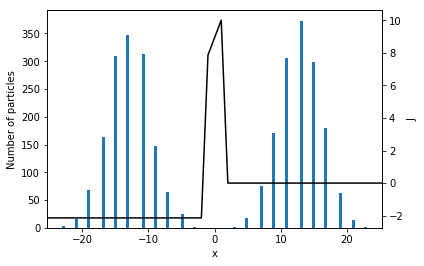

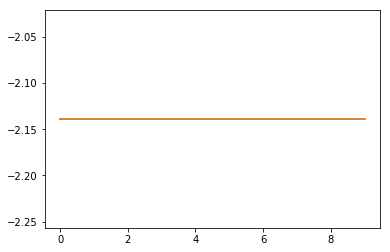

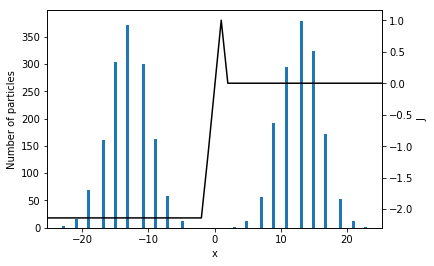

In [10]:
#Oppg 7.2
time_steps = 10
beta_V0 = [(10,1),(1,10)]
for n,m in beta_V0:
    plot_distribution2(n,m, "hei")

### Exercise 8.1

<Figure size 432x288 with 0 Axes>

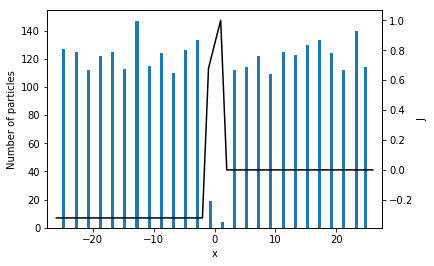

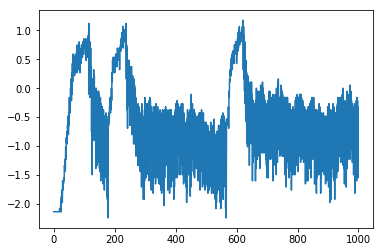

In [11]:
V0K_closed = 50
V0Na_closed = 50
V0_open = 1
time_steps = 1000

plot_distribution2(V0K_closed, V0Na_closed, "hei", V0_open, True)

### Exercise 8.2

In [12]:
time_steps = 500
plot_distribution2(V0K_closed, V0Na_closed, "hei", V0_open, True, True)

IndexError: index 1450 is out of bounds for axis 1 with size 1450